In [1]:
import pandas as pd
import time
import datetime
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

In [2]:
PATH_TO_DATA = 'Data'
TEST_FILE = 'test_ds.csv'
TRAIN_FILE = 'train_ds.csv'

In [3]:
def read_data(folder, file):
    df = pd.read_csv(folder + '/' + file)
    return df

In [4]:
train_df = read_data(PATH_TO_DATA, TRAIN_FILE)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92700 entries, 0 to 92699
Data columns (total 9 columns):
cgsettlementbufferid    92700 non-null int64
mcc                     92700 non-null int64
tranccy                 92700 non-null int64
ccy                     92700 non-null int64
amount                  92700 non-null int64
location                92700 non-null object
trandatetime            92700 non-null int64
sexid                   92700 non-null int64
clientid                92700 non-null int64
dtypes: int64(8), object(1)
memory usage: 6.4+ MB


In [6]:
train_df_index = train_df.index.tolist()

In [7]:
y_train_total = train_df['sexid']

In [8]:
train_client_id = train_df['clientid']

In [9]:
len(y_train_total)

92700

In [10]:
test_df = read_data(PATH_TO_DATA, TEST_FILE)

In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40559 entries, 0 to 40558
Data columns (total 8 columns):
cgsettlementbufferid    40559 non-null int64
mcc                     40559 non-null int64
tranccy                 40559 non-null int64
ccy                     40559 non-null int64
amount                  40559 non-null int64
location                40559 non-null object
trandatetime            40559 non-null int64
clientid                40559 non-null int64
dtypes: int64(7), object(1)
memory usage: 2.5+ MB


In [12]:
test_df_index = test_df.index.tolist()

In [13]:
test_client_id = test_df['clientid']

In [14]:
cat_train_df = train_df.drop(['cgsettlementbufferid', 'sexid', 'clientid'], axis=1)

In [15]:
cat_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92700 entries, 0 to 92699
Data columns (total 6 columns):
mcc             92700 non-null int64
tranccy         92700 non-null int64
ccy             92700 non-null int64
amount          92700 non-null int64
location        92700 non-null object
trandatetime    92700 non-null int64
dtypes: int64(5), object(1)
memory usage: 4.2+ MB


In [16]:
cat_test_df = test_df.drop(['cgsettlementbufferid', 'clientid'], axis=1)

In [17]:
cat_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40559 entries, 0 to 40558
Data columns (total 6 columns):
mcc             40559 non-null int64
tranccy         40559 non-null int64
ccy             40559 non-null int64
amount          40559 non-null int64
location        40559 non-null object
trandatetime    40559 non-null int64
dtypes: int64(5), object(1)
memory usage: 1.9+ MB


In [18]:
cat_df = cat_train_df.append(cat_test_df)

In [19]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133259 entries, 0 to 40558
Data columns (total 6 columns):
mcc             133259 non-null int64
tranccy         133259 non-null int64
ccy             133259 non-null int64
amount          133259 non-null int64
location        133259 non-null object
trandatetime    133259 non-null int64
dtypes: int64(5), object(1)
memory usage: 7.1+ MB


In [20]:
curr_data = dict()
for curr in list(cat_df['tranccy'].unique()):
    mean_value = cat_df[cat_df['tranccy'] == curr]['amount'].mean()
    std_value = cat_df[cat_df['tranccy'] == curr]['amount'].std()
    curr_data[curr] = [mean_value, std_value]

def normalize_amount(raw):
    temp = (raw['amount'] - curr_data[raw['tranccy']][0])/curr_data[raw['tranccy']][1]
    return temp

#cat_df['amount'] = cat_df.apply(normalize_amount, axis=1)        

In [21]:
cat_df['amount']

0           6730
1          55912
2         135658
3         138294
4         426209
5            161
6             85
7             85
8            161
9          19437
10         37031
11         15639
12         13628
13           161
14          5793
15         74183
16          6568
17         39900
18         87500
19         49500
20         45900
21         30400
22         60002
23        100000
24         39920
25         23500
26         10150
27         30940
28       1785500
29         10000
          ...   
40529      35500
40530    5642000
40531      50000
40532      20000
40533      40000
40534    1200000
40535     400000
40536      40000
40537      20000
40538     200000
40539     200000
40540     190000
40541     110000
40542    9500000
40543     577000
40544      50000
40545       4500
40546     135000
40547    1079562
40548      96180
40549      32664
40550       4875
40551       1470
40552     150000
40553       8637
40554      21185
40555      49453
40556     3000

In [22]:
def normalize_amount(raw):
    temp = (row['amount'] - curr_data[row['tranccy']][0])/curr_data[row['tranccy']][1]
    return temp

In [23]:
cat_df['amount']

0           6730
1          55912
2         135658
3         138294
4         426209
5            161
6             85
7             85
8            161
9          19437
10         37031
11         15639
12         13628
13           161
14          5793
15         74183
16          6568
17         39900
18         87500
19         49500
20         45900
21         30400
22         60002
23        100000
24         39920
25         23500
26         10150
27         30940
28       1785500
29         10000
          ...   
40529      35500
40530    5642000
40531      50000
40532      20000
40533      40000
40534    1200000
40535     400000
40536      40000
40537      20000
40538     200000
40539     200000
40540     190000
40541     110000
40542    9500000
40543     577000
40544      50000
40545       4500
40546     135000
40547    1079562
40548      96180
40549      32664
40550       4875
40551       1470
40552     150000
40553       8637
40554      21185
40555      49453
40556     3000

In [24]:
import datetime
import time

In [25]:
def get_day(timestamp):
    day = datetime.datetime.fromtimestamp(timestamp).strftime('%A')
    return day

In [26]:
def get_month(timestamp):
    month = datetime.datetime.fromtimestamp(timestamp).strftime('%B')
    return month

In [27]:
def get_year(timestamp):
    year = datetime.datetime.fromtimestamp(timestamp).strftime('%Y')
    return year

In [28]:
def get_hour(timestamp):
    hour = datetime.datetime.fromtimestamp(timestamp).strftime('%H')
    return hour

In [29]:
def get_country(local):
    country = local[36:].strip()
    return country    

In [30]:
def get_city(local):
    city = local[23:36].strip()
    return city

In [31]:
def get_inst(local):
    inst = local[0:22].strip()
    return inst

In [32]:
cat_df['year'] = cat_df['trandatetime'].apply(lambda x: get_year(x))
cat_df['month'] = cat_df['trandatetime'].apply(lambda x: get_month(x))
cat_df['day'] = cat_df['trandatetime'].apply(lambda x: get_day(x))
cat_df['hour'] = cat_df['trandatetime'].apply(lambda x: get_hour(x))
cat_df['country'] = cat_df['location'].apply(lambda x: get_country(x))
cat_df['city'] = cat_df['location'].apply(lambda x: get_city(x))
cat_df['institution'] = cat_df['location'].apply(lambda x: get_inst(x))

In [33]:
print(len(cat_df['city'].unique().tolist()))

3018


In [34]:
full_country_list = sorted(cat_df['country'].unique().tolist())
print(sorted(cat_df['country'].unique().tolist()))

['', '. UA', 'A UA', 'AD', 'ADAD', 'AE', 'AEAE', 'AG', 'AM', 'ARUS', 'AT', 'ATAT', 'AU', 'AUAU', 'AZ', 'AZUS', 'BB', 'BE', 'BEBE', 'BF', 'BG', 'BGBG', 'BR', 'BY', 'BYBY', 'CACA', 'CAUS', 'CH', 'CHCH', 'CN', 'CNCN', 'CR', 'CW', 'CY', 'CYCY', 'CZ', 'CZCZ', 'DCUS', 'DE', 'DEDE', 'DEUS', 'DK', 'DKDK', 'DO', 'DODO', 'EE', 'EG', 'EGEG', 'ES', 'ESES', 'FI', 'FLUS', 'FR', 'FRFR', 'GAUS', 'GB', 'GBGB', 'GE', 'GEGE', 'GH', 'GI', 'GIGI', 'GR', 'GRGR', 'HK', 'HKHK', 'HR', 'HRHR', 'HU', 'HUHU', 'IAUS', 'ID', 'IDUS', 'IE', 'IEIE', 'IL', 'ILIL', 'ILUS', 'IN', 'ININ', 'IT', 'ITIT', 'JO', 'JPJP', 'K UA', 'KN', 'KSUS', 'KW', 'KZ', 'KZKZ', 'LK', 'LT', 'LU', 'LULU', 'LV', 'LVLV', 'MC', 'MCMC', 'MD', 'MDMD', 'MDUS', 'ME', 'MEME', 'MGMG', 'MK', 'MKMK', 'ML', 'MNUS', 'MOUS', 'MT', 'MU', 'MUMU', 'MV', 'MY', 'MYMY', 'NCUS', 'NEUS', 'NJUS', 'NL', 'NLNL', 'NO', 'NONO', 'NVUS', 'NYUS', 'OHUS', 'ONCA', 'ORUS', 'PAUS', 'PEPE', 'PL', 'PLPL', 'PR', 'PT', 'PTPT', 'PYPY', 'RO', 'RORO', 'RS', 'RSRS', 'RU', 'RURU', 'SE',

In [35]:
print(len(sorted(cat_df['country'].unique().tolist())))

168


In [36]:
UA_list = ['. UA', 'A UA', 'UA', 'UAUA', 'K UA']
AD_list = ['AD', 'ADAD']
AE_list = ['AE', 'AEAE']
AT_list = ['AT', 'ATAT']
AU_list = ['AU', 'AUAU']
BE_list = ['BE', 'BEBE']
BG_list = ['BG', 'BGBG']
BY_list = ['BY', 'BYBY']
US_list = ['USUS', 'UTUS', 'US', 'WAUS', 'WIUS', 'AZUS', 'DEUS', 'FLUS', 'GAUS']

In [37]:
def get_US_list(country):
    res = list()
    for con in country:
        if len(con) == 4:
            if con.endswith('US'):
                res.append(con)
    return res

In [38]:
def get_UA_list(country):
    res = list()
    for con in country:
        if len(con) == 4:
            if con.endswith('UA'):
                res.append(con)
    return res

In [39]:
list_US = get_US_list(sorted(cat_df['country'].unique().tolist()))
list_UA = get_UA_list(sorted(cat_df['country'].unique().tolist()))

In [40]:
print(len(list_US))
print(len(list_UA))

28
5


In [41]:
temp_country_list = set(full_country_list) - set(list_US) - set(list_UA)

In [42]:
def get_double(country_list):
    res_dict = dict()
    two_letters_list = list()
    for country in country_list:
        if len(country) == 2:
            two_letters_list.append(country)
    for two in two_letters_list:
        for country in country_list:
            if len(country) == 4:
                if country.endswith(two):
                    res_dict[two] = [two, country]
    return res_dict

In [43]:
doubles_dict = get_double(temp_country_list)

In [44]:
doubles_dict['UA'] = list_UA
doubles_dict['US'] = list_US

In [45]:
num = 0
for val in doubles_dict.values():
    num += len(val)
print(num)

129


In [46]:
temp = list()
for val in doubles_dict.values():
    temp = temp + val

temp_country = list(set(full_country_list) - set(temp))
print(temp_country)

['', 'LK', 'ONCA', 'FI', 'SN', 'TG', '™rCHCH', 'vHUHU', 'CR', 'TJ', 'MT', 'PEPE', 'BR', 'oCHCH', 'PYPY', 'UA', 'VN', 'BF', 'BB', 'ML', 'JPJP', 'MV', 'CW', 'JO', 'AG', 'ID', 'CACA', 'SG', 'TH', 'KW', 'MGMG', 'EE', 'AM', 'KN', 'lHUHU', 'LT', 'AZ', 'GH', 'PR']


In [47]:
doubles_dict['UA'].append('UA')
temp_country.remove('UA')

In [48]:
doubles_dict

{'AD': ['AD', 'ADAD'],
 'AE': ['AE', 'AEAE'],
 'AT': ['AT', 'ATAT'],
 'AU': ['AU', 'AUAU'],
 'BE': ['BE', 'BEBE'],
 'BG': ['BG', 'BGBG'],
 'BY': ['BY', 'BYBY'],
 'CH': ['CH', 'CHCH'],
 'CN': ['CN', 'CNCN'],
 'CY': ['CY', 'CYCY'],
 'CZ': ['CZ', 'CZCZ'],
 'DE': ['DE', 'DEDE'],
 'DK': ['DK', 'DKDK'],
 'DO': ['DO', 'DODO'],
 'EG': ['EG', 'EGEG'],
 'ES': ['ES', 'ESES'],
 'FR': ['FR', 'FRFR'],
 'GB': ['GB', 'GBGB'],
 'GE': ['GE', 'GEGE'],
 'GI': ['GI', 'GIGI'],
 'GR': ['GR', 'GRGR'],
 'HK': ['HK', 'HKHK'],
 'HR': ['HR', 'HRHR'],
 'HU': ['HU', 'HUHU'],
 'IE': ['IE', 'IEIE'],
 'IL': ['IL', 'ILIL'],
 'IN': ['IN', 'ININ'],
 'IT': ['IT', 'ITIT'],
 'KZ': ['KZ', 'KZKZ'],
 'LU': ['LU', 'LULU'],
 'LV': ['LV', 'LVLV'],
 'MC': ['MC', 'MCMC'],
 'MD': ['MD', 'MDMD'],
 'ME': ['ME', 'MEME'],
 'MK': ['MK', 'MKMK'],
 'MU': ['MU', 'MUMU'],
 'MY': ['MY', 'MYMY'],
 'NL': ['NL', 'NLNL'],
 'NO': ['NO', 'NONO'],
 'PL': ['PL', 'PLPL'],
 'PT': ['PT', 'PTPT'],
 'RO': ['RO', 'RORO'],
 'RS': ['RS', 'RSRS'],
 'RU': ['RU

In [49]:
len(sorted(temp_country))

38

In [50]:
for country in temp_country:
    print(country, cat_df[cat_df['country'] == country]['country'].count())

 1
LK 8
ONCA 12
FI 25
SN 1
TG 1
™rCHCH 4
vHUHU 1
CR 12
TJ 1
MT 56
PEPE 1
BR 12
oCHCH 1
PYPY 2
VN 1
BF 1
BB 2
ML 2
JPJP 2
MV 8
CW 2
JO 4
AG 2
ID 26
CACA 4
SG 62
TH 229
KW 2
MGMG 3
EE 3
AM 3
KN 5
lHUHU 1
LT 73
AZ 1
GH 33
PR 1


In [51]:
doubles_dict['MT'] = ['MT', 'MTMT']
doubles_dict['BR'] = ['BR', 'BRBR']
doubles_dict['FI'] = ['FI', 'FIFI']
doubles_dict['TH'] = ['TH', 'THTH']
doubles_dict['GH'] = ['GH', 'GHGH']
doubles_dict['ID'] = ['ID', 'IDID']
doubles_dict['CR'] = ['CR', 'CRCR']
doubles_dict['CA'] = ['CA','ONCA', 'CACA']
doubles_dict['SG'] = ['SG', 'SGSG']

In [52]:
temp_country = list(set(temp_country) - set(['MT', 'BR', 'FI', 'TH', 'GH', 'ID', 'CR', 'ONCA', 'CACA', 'SG']))

In [53]:
temp_country

['',
 'LK',
 'SN',
 'TG',
 '™rCHCH',
 'vHUHU',
 'TJ',
 'PEPE',
 'oCHCH',
 'PYPY',
 'VN',
 'BF',
 'BB',
 'ML',
 'JPJP',
 'MV',
 'CW',
 'JO',
 'AG',
 'KW',
 'MGMG',
 'EE',
 'AM',
 'KN',
 'lHUHU',
 'LT',
 'AZ',
 'PR']

In [54]:
doubles_dict['NDFCountry'] = temp_country

In [55]:
doubles_dict

{'AD': ['AD', 'ADAD'],
 'AE': ['AE', 'AEAE'],
 'AT': ['AT', 'ATAT'],
 'AU': ['AU', 'AUAU'],
 'BE': ['BE', 'BEBE'],
 'BG': ['BG', 'BGBG'],
 'BR': ['BR', 'BRBR'],
 'BY': ['BY', 'BYBY'],
 'CA': ['CA', 'ONCA', 'CACA'],
 'CH': ['CH', 'CHCH'],
 'CN': ['CN', 'CNCN'],
 'CR': ['CR', 'CRCR'],
 'CY': ['CY', 'CYCY'],
 'CZ': ['CZ', 'CZCZ'],
 'DE': ['DE', 'DEDE'],
 'DK': ['DK', 'DKDK'],
 'DO': ['DO', 'DODO'],
 'EG': ['EG', 'EGEG'],
 'ES': ['ES', 'ESES'],
 'FI': ['FI', 'FIFI'],
 'FR': ['FR', 'FRFR'],
 'GB': ['GB', 'GBGB'],
 'GE': ['GE', 'GEGE'],
 'GH': ['GH', 'GHGH'],
 'GI': ['GI', 'GIGI'],
 'GR': ['GR', 'GRGR'],
 'HK': ['HK', 'HKHK'],
 'HR': ['HR', 'HRHR'],
 'HU': ['HU', 'HUHU'],
 'ID': ['ID', 'IDID'],
 'IE': ['IE', 'IEIE'],
 'IL': ['IL', 'ILIL'],
 'IN': ['IN', 'ININ'],
 'IT': ['IT', 'ITIT'],
 'KZ': ['KZ', 'KZKZ'],
 'LU': ['LU', 'LULU'],
 'LV': ['LV', 'LVLV'],
 'MC': ['MC', 'MCMC'],
 'MD': ['MD', 'MDMD'],
 'ME': ['ME', 'MEME'],
 'MK': ['MK', 'MKMK'],
 'MT': ['MT', 'MTMT'],
 'MU': ['MU', 'MUMU'],
 'M

In [56]:
num = 0
for val in doubles_dict.values():
    num += len(val)
print(num)

177


In [57]:
len(list(doubles_dict.keys()))

60

In [58]:
def get_normal_country(country):
    for key in doubles_dict.keys():
        if country in doubles_dict[key]:
            return key

In [59]:
cat_df['country'] = cat_df['country'].apply(lambda x: get_normal_country(x))

In [60]:
len(cat_df['country'].unique().tolist())

60

In [61]:
print(sorted(cat_df['city'].unique().tolist()))

['+17029399819', '+34976362127', '+357-22514442', '+441273852359', '+442070237556', '+74956680633', '+74957270606', '-', '-GRANDATE', '-PIAVE', '-S.GIOVANNI', '.DONA DI PIAV', '.MILANO EST', '000000060001/', '000000750801/', '000000750806/', '000000750807/', '00VISA DIRECT', '01865 616000', '019281199', '0207 6797742', '02072339533', '02077561000', '03336661000', '06200', '06211', '06300', '06ANTIBES', '06ANTIBES  VP', '06CANNES', '06CANNES(((30', '06CANNES(((37', '06GRASSE', '06MENTON', '06NICE', '06ROQUEBRUNE', '06SNG1 CB', '06SNI1 CB', '06SNI5 CB', '06ST JEAN CAP', '06ST LAURENT', '06ST PAUL', '06ST PAUL VEN', '06VILLEFRANCH', '08000304238', '08002889949', '08003685302', '08005434835', '08009666546', '0845 900 1234', '08456025612', '08669642867', '0870 8387294', '0870070191', '0CHINA0000000', '1', '1-888-3009348', '11 XLM EO', '12 ATLANTIC B', '14DEAUVILLE', '14HONFLEUR', '2015582683', '2022764906', '2024996427', '20260 KORCULA', '206-632-2421', '208-472-9400', '212-9202020', '21239

In [62]:
city_list_draft = cat_df['city'].unique().tolist()
print(len(sorted(city_list_draft)))

3018


In [63]:
import re
def preprocessor(text):
    text = re.sub('[\W] +', ' ', text)
    return text

In [64]:
cat_df['city'] = cat_df['city'].apply(preprocessor)

In [65]:
city_list_draft = cat_df['city'].unique().tolist()
print(len(sorted(city_list_draft)))

3011


In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN

In [67]:
vect = TfidfVectorizer(analyzer='char', lowercase=True, max_df=1.0, min_df=1, use_idf=False)
city_transform = vect.fit_transform(city_list_draft)
claster = DBSCAN(algorithm='brute', eps=0.59, min_samples=2, leaf_size=35, p=2)
res = claster.fit_predict(city_transform)

In [68]:
res_dict_city = dict()
for key, city in list(zip(res, cat_df['city'].unique().tolist())):
    if key in res_dict_city:
        res_dict_city[key].append(city)
    else:
        res_dict_city[key] = [city]

In [69]:
res_dict_city.keys()

dict_keys([0, 1, 2, 3, -1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134])

In [70]:
res_dict_city

{-1: ['Kaprun',
  'AIRBNB.COM',
  'FIGUERES',
  'YUZHNE',
  '06NICE',
  'OUAGADOUGOU',
  'CLICHY',
  'BUZOVA',
  'CHANTILLY',
  '1',
  'KYIV UA',
  'GARDEN CITY',
  'PALS',
  'MONT-RAS',
  'DMYTRUSHKY',
  'PERVOM (NIK)',
  'VENTIMIGLIA',
  'CERGY',
  'MDINA',
  'COCONUT CREEK',
  'BEVERLY HILLS',
  'D-BREHMPLA >',
  "LA BISBAL D'E",
  'ZOAGLI',
  'St Moritz',
  'OD.OBL.KOMINT',
  "GRETS'KA 14",
  '76530 GRAND C',
  '95LSA6 CB',
  '786-4995449',
  'NEW YORK',
  'CHUTOVO',
  'AMZN.COM/BILL',
  '95709118 ROIS',
  'ALGHERO',
  "ST JOHN'S",
  'SLAVUTICH',
  '95LDM2 CB',
  'Germany',
  '77CHESSY',
  '77FONTAINEBLE',
  'GIFTSFLOWERS.',
  'DUE-KOE 41',
  'JEAN',
  'GOUVIEUX',
  'BILL.MS.NET',
  'LVIV-BRUHOVYC',
  'D-KOENI 41',
  'SKOPJE',
  'BEIJING',
  'St Wolfgang',
  'ZHASHKIV',
  'SVETI JURIJ O',
  'CHOP',
  'GATTEO',
  'SUMY',
  'CAPRI',
  'DUBROVNIK',
  'DENIA',
  'PAVSHYNO',
  'ERBUSCO',
  'CODOGNE',
  'amzn.com/prme',
  'ITUNES.COM',
  'AMALFI',
  'KTIV',
  'OVRUCH',
  'WWW.TRAVELSTA',

In [71]:
new_city_list_draft = list(set(city_list_draft) - set(res_dict_city[131]) - set(res_dict_city[130]) - set(res_dict_city[118]) \
- set(res_dict_city[112]) - set(res_dict_city[90]) - set(res_dict_city[82]) - set(res_dict_city[81])\
- set(res_dict_city[70]) - set(res_dict_city[60])  - set(res_dict_city[51])\
- set(res_dict_city[47]) - set(res_dict_city[34]) - set(res_dict_city[29]) \
- set(res_dict_city[1]))

In [72]:
len(new_city_list_draft)

2858

In [73]:
not_city_list = res_dict_city[131] + res_dict_city[130] + res_dict_city[118] \
+ res_dict_city[112] + res_dict_city[90] + res_dict_city[82] + res_dict_city[81]\
+ res_dict_city[70] + res_dict_city[60]  + res_dict_city[51]\
+ res_dict_city[47] + res_dict_city[34] + res_dict_city[29] \
+ res_dict_city[1]

In [74]:
len(not_city_list)

153

In [75]:
vect_1 = TfidfVectorizer(analyzer='char', lowercase=True, max_df=1.0, min_df=1, use_idf=False)
city_transform_1 = vect_1.fit_transform(new_city_list_draft)
claster_1 = DBSCAN(algorithm='brute', eps=0.6, min_samples=2, leaf_size=35, p=2)
res_1 = claster_1.fit_predict(city_transform_1)

In [76]:
set(list(res_1))

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102}

In [77]:
res_dict_city_1 = dict()
for key, city in list(zip(res_1, new_city_list_draft)):
    if key in res_dict_city_1:
        res_dict_city_1[key].append(city)
    else:
        res_dict_city_1[key] = [city]

In [78]:
res_dict_city_1

{-1: ['FULE',
  'MOSCOW REG.',
  'SO SUD',
  'TWIN TOWER',
  'GS 017',
  'PASIKY-ZUBRET',
  'MAINZ',
  'MSK',
  'PEGNITZ',
  'CHONBURI',
  '77FONTAINEBLE',
  '93600 Kuusamo',
  'PYLYPOVYCHI',
  '95LDM2 CB',
  'BOBRUISK.R-N',
  'DUBNO',
  'LEIPZIG',
  'GOVEDJARI',
  'AIRBNB.COM',
  'GUINCHO',
  'FP8383VANDIS/',
  '913-535-6937',
  'CZESTOCHOWA',
  'FIUMICELLO',
  'Badung (Kab)',
  'ULM',
  'DENYKHIVKA',
  'PROCOV',
  'A-ROV.N.',
  'C.HIGHLANDS',
  'CAUSEWAY BAY',
  'GATWICK SOUTH',
  'VELIZY-VILLAC',
  '85662 Feldkir',
  'Brunn am Gebi',
  '76530 GRAND C',
  'BELG.-DNESTR.',
  'ELIZABETH',
  '380444286128',
  'DNDZERZHYNSK',
  'MISSGUIDED.CO',
  '888-888-8888',
  'Cottbus',
  'S MOLODYZHNOY',
  'G.B.CERKOV',
  'THERMI,EMP.CO',
  '877.270.4536',
  '786-4995449',
  'BIBBIENA',
  'KOZYN',
  'SVETI JURIJ O',
  'WATFORD',
  'CAGNES SUR ME',
  'LUXEMBOURG',
  '+34976362127',
  'St Vigil',
  'FR LAZNE',
  'MOGILEV',
  'BRODETCKA',
  '5-5A ST STEPH',
  'D-OBERKASS >',
  'Germany',
  'DDFNORD 47

In [79]:
import csv
with open('dict.csv', 'w', encoding="utf-8") as csv_file:
  writer = csv.writer(csv_file)
  for key, value in res_dict_city_1.items():
    writer.writerow(sorted(value))

In [80]:
popularity_res_list = list()
for key in res_dict_city_1:
    for city in res_dict_city_1[key]:
        popularity_res_list.append((city, cat_df[cat_df['city'] == city]['city'].count()))
sort_1 = sorted(popularity_res_list, key=lambda x: x[1], reverse=True)

In [81]:
with open('sorted_file.csv','w', encoding="utf-8") as out:
  csv_out=csv.writer(out)
  csv_out.writerow(['city','num'])
  for row in sort_1:
    csv_out.writerow(row)

In [82]:
sort_2 = sorted(popularity_res_list, key=lambda x: x[0], reverse=False)

In [83]:
with open('sorted_file_0.csv','w', encoding="utf-8") as out:
  csv_out=csv.writer(out)
  csv_out.writerow(['city','num'])
  for row in sort_2:
    csv_out.writerow(row)

In [84]:
cities_dict = dict()
with open(PATH_TO_DATA + '/' + 'cities_list.csv','r') as data:
    reader = csv.reader(data)
    for line in reader:
        line[:] = [item for item in line if item != '']
        cities_dict[line[0]] = sorted(list(set(line)))
cities_dict

{'ABU DHABI': ['ABU DHABI'],
 'ACCRA': ['ACCRA'],
 'ALCHEVSK': ['ALCHEVSK'],
 'ALMATY': ['ALMATY'],
 'AMSTERDAM': ['AMSTELVEEN', 'AMSTERDAM', 'Amsterdam'],
 'ANDORRA': ['ANDORRA', 'ANDORRA LA VE'],
 'ANKARA': ['ANKARA'],
 'ANTALYA': ['ANTALYA'],
 'ANTIBES': ['ANTIBES'],
 'ATHINA': ['ATHINA', 'Athens'],
 'BALAKLEYA': ['BALAKLEYA', 'Balakliya'],
 'BALI': ['BALI', 'BALI DENPASAR', 'BALI KUTA'],
 'BANGKOK': ['BANGKOK', 'Bangkok'],
 'BAR': ['BAR', 'Bar'],
 'BARANYNTSI': ['BARANINTSY', 'BARANYNSI', 'BARANYNTSI'],
 'BARCELONA': ['BARCELLONA', 'BARCELONA', 'Barcelona'],
 'BELAYA TSERKO': ['B TSERKOV',
  'B.TSERKVA',
  'BELAYA TSERKO',
  'BILA CERKVA',
  'BILA TSERKVA',
  'Bila Tserkva'],
 'BELGOROD': ['BELG.-DNESTR.', 'BELGOROD', 'BELGORODSKY R'],
 'BERLIN': ['BERLIN', 'Berlin'],
 'BOLSHIE LAZY': ['BOLSHIE LAZY'],
 'BORYSPIL': ['AEROPORT BORY',
  'BORISPIL',
  'BORISPOL',
  'BORYSPIL',
  "BORYSPIL'",
  'BORYSPIL-7',
  'BORYSPOL'],
 'BOYARKA': ['BOYARKA'],
 'BROVARY': ['BROVARI', 'BROVARY', 'Br

In [85]:
def get_normal_city(city):
    for key in cities_dict.keys():
        #print(key, city)
        for city_d in cities_dict[key]:
            #print(city, city_d)
            if city == city_d:              
                return key
                break
    else:
        return 'no city'

In [86]:
cat_df['city']

0        SANT JOAN DES
1            BARCELONA
2            BARCELONA
3            BARCELONA
4            BARCELONA
5            BARCELONA
6            BARCELONA
7            BARCELONA
8            BARCELONA
9            BARCELONA
10           BARCELONA
11              GIRONA
12              GIRONA
13           BARCELONA
14               Accra
15               ACCRA
16               ACCRA
17         866-6112623
18              ODESSA
19              ODESSA
20              ODESSA
21              ODESSA
22       V.OLEKSANDRIV
23            UZHGOROD
24            UZHGOROD
25            UZHGOROD
26                KIEV
27            UZHGOROD
28              ODESSA
29              ODESSA
             ...      
40529         UZHGOROD
40530          KHARKOV
40531           ODESSA
40532          KHARKIV
40533            LUTSK
40534       ZAPOROZHYE
40535             KYIV
40536        MUKACHEVO
40537        MUKACHEVO
40538          KHARKIV
40539             LVOV
40540             KYIV
40541      

In [87]:
cat_df['city'] = cat_df['city'].apply(lambda x: get_normal_city(x))

In [88]:
sorted(list(cat_df['city'].unique()))

['ABU DHABI',
 'ACCRA',
 'ALCHEVSK',
 'ALMATY',
 'AMSTERDAM',
 'ANDORRA',
 'ANKARA',
 'ANTALYA',
 'ANTIBES',
 'ATHINA',
 'BALAKLEYA',
 'BALI',
 'BANGKOK',
 'BAR',
 'BARANYNTSI',
 'BARCELONA',
 'BELAYA TSERKO',
 'BELGOROD',
 'BERLIN',
 'BOLSHIE LAZY',
 'BORYSPIL',
 'BOYARKA',
 'BROVARY',
 'BUCHA',
 'BUDAPEST',
 'BUZOVA',
 'CAIRO',
 'CANNES',
 'CHERKASSY',
 'CHERNIVTSI',
 'CHICAGO',
 'DERGACHI',
 'DNDZERZHYNSK',
 'DNEPROPETR-SK',
 'DOKUCHAEVSK',
 'DONETSK',
 'DRESDEN',
 'DUBAI',
 'DUBLIN',
 'DUBOVOE',
 'DUESSELDORF',
 'FIRENZE',
 'FRANKFURT',
 'FURMANKA',
 'GIBRALTAR',
 'GORA',
 'GOSTOMEL',
 'HANGZHOU',
 'HODOSIVKA',
 'ILYICHEVSK',
 'IRPIN',
 'IRSHAVA',
 'ISTANBUL',
 'IVANO-FRANK.',
 'KALYNIVKA',
 'KARLIVKA',
 'KHARKOV',
 'KHIMKI',
 'KHMELNITSKIY',
 'KINCHESH',
 'KIROVOGRAD',
 'KISVARDA',
 'KLYACHANOVO',
 'KOROSTEN',
 'KOROVIYA',
 'KRAKOVETS',
 'KRAKOW',
 'KREMENCHUG',
 'KUALA LUMPUR',
 'KYIV',
 'LADYZHYNKA',
 'LAS VEGAS',
 'LEICESTER',
 'LISBOA',
 'LITIN',
 'LONDON',
 'LOS ANGELES',
 'L

In [89]:
cat_df[cat_df['city'] == 'KYIV']['city'].count()

57265

In [90]:
for mcc in sorted(cat_df['mcc'].unique()):
    print(mcc, cat_df[cat_df['mcc'] == mcc]['mcc'].count())

0 1
742 14
763 2
1520 1
1750 3
2741 5
3000 3
3001 4
3005 2
3007 5
3008 13
3010 1
3011 25
3016 1
3026 4
3032 7
3037 1
3047 6
3051 4
3056 1
3058 5
3075 1
3077 1
3089 7
3103 2
3136 4
3182 4
3184 1
3217 24
3245 7
3246 31
3248 3
3351 2
3355 5
3357 7
3366 1
3381 11
3387 2
3389 10
3395 3
3405 5
3501 6
3502 2
3503 1
3504 5
3509 16
3512 24
3513 1
3520 2
3533 5
3535 18
3538 3
3543 8
3548 1
3579 3
3580 3
3590 3
3591 2
3596 3
3612 1
3634 1
3640 10
3642 9
3649 12
3654 4
3657 1
3690 1
3709 2
3710 4
3716 2
3730 1
3750 2
3754 1
3807 4
3826 4
3831 2
4011 31
4111 52
4112 1400
4119 1
4121 104
4131 79
4214 2
4215 27
4225 2
4411 5
4457 9
4468 3
4511 512
4582 18
4722 340
4784 220
4789 27
4812 1035
4814 2690
4816 316
4829 12
4899 3072
4900 1130
5013 10
5021 7
5044 2
5045 40
5046 2
5047 5
5065 22
5094 16
5099 36
5111 19
5122 16
5131 30
5137 2
5139 12
5169 165
5172 21
5192 20
5193 71
5199 3
5200 114
5211 1420
5231 2
5251 23
5261 13
5271 3
5300 8
5309 285
5310 33
5311 404
5331 1151
5399 124
5411 18481
5422 71
5

In [91]:
popularity_mcc = list()
for mcc in sorted(cat_df['mcc'].unique()):
    popularity_mcc.append((mcc, cat_df[cat_df['mcc'] == mcc]['mcc'].count()))
sort_mcc = sorted(popularity_mcc, key=lambda x: x[1], reverse=True)

In [92]:
sort_mcc

[(6010, 19796),
 (5411, 18481),
 (5499, 16520),
 (6011, 13628),
 (5812, 9811),
 (5541, 8392),
 (5912, 3988),
 (6012, 3434),
 (4899, 3072),
 (4814, 2690),
 (6536, 2689),
 (5814, 2558),
 (5977, 1961),
 (5651, 1581),
 (5211, 1420),
 (4112, 1400),
 (5331, 1151),
 (4900, 1130),
 (7011, 1047),
 (4812, 1035),
 (5691, 882),
 (5813, 833),
 (6538, 746),
 (5661, 651),
 (5441, 522),
 (4511, 512),
 (7399, 500),
 (7832, 484),
 (7995, 443),
 (5311, 404),
 (5968, 372),
 (5641, 363),
 (6051, 363),
 (5722, 354),
 (5964, 344),
 (4722, 340),
 (4816, 316),
 (5941, 286),
 (5309, 285),
 (5945, 273),
 (5655, 267),
 (7230, 262),
 (5631, 260),
 (5921, 260),
 (5621, 235),
 (8999, 221),
 (4784, 220),
 (5999, 208),
 (5942, 194),
 (7311, 193),
 (7994, 168),
 (5732, 166),
 (5169, 165),
 (7997, 162),
 (5947, 158),
 (5944, 154),
 (8099, 153),
 (5699, 151),
 (7922, 146),
 (5995, 133),
 (5712, 132),
 (5611, 127),
 (5399, 124),
 (7298, 122),
 (5200, 114),
 (5735, 108),
 (4121, 104),
 (7999, 97),
 (7523, 95),
 (5931, 89),

In [93]:
avia = list(range(3000,3301))
veterinary = [742]
agricultural = [763]
general_contractor = [1520]
carpentry_contractors = [1750]
miscellaneous_publishing_and_printing = [2741]
car_rental_agencies = list(range(3351,3441))
hotels_motels_resorts = list(range(3501,3836))
railroads = [4011]
commuter_passenger_transportation = [4111]
passenger_railways = [4112]
ambulance_services = [4119]
taxicabs_limousines = [4121]
bus_lines = [4131]
motor_freight_carriers_and_trucking = [4214]
courier_services = [4215]
public_warehousing_and_storage = [4225]
steamship_and_cruise_lines = [4411]
boat_rentals_and_leasing = [4457]
marinas_marine_service = [4468]
airlines_and_air_carriers = [4511]
airports_flying_fields_and_airport_terminals = [4582]
travel_agencies = [4722]
tolls_and_bridge_fees = [4784]
transportation_services = [4789]
telecommunication_equipment = [4812]
telecommunication_services = [4814]
computer_network = [4816]
money_transfer = [4829]
cable_satellite_and_other_pay_television = [4899]
utilities_electric_gas_water_and_sanitary = [4900]
motor_vehicle_supplies_and_new_parts = [5013]
office_and_commercial_furniture = [5021]
manual_cash_disbursements = [6010]
automated_cash_disbursements = [6011]
grocery_stores_and_supermarkets = [5411]
miscellaneous_food_stores = [5499]
eating_places_and_restaurants = [5812]
candy_nut_and_Confectionery_stores = [5541]
drug_stores_and_pharmacies = [5912]
merchandise_services_and_debt_repayment = [6012]
mastercard_moneysend = list(range(6536,6538))
fast_food_restaurants = [5814]
cosmetic_stores = [5977]
family_clothing_stores = [5651]
lumber_building_materials_stores = [5211]
variety_stores = [5331]
hotels_motels_and_resorts = [7011]
men_s_women_s_clothing_stores = [5691]
drinking_places = [5813]
shoe_stores = [5661]
confectionery = [5441]
miscellaneous_business_services = [7399]
motion_picture_theaters_cinema = [7832]
betting_casino_gambling = [7995]
department_stores = [5311]
direct_marketing_merchant = [5968]
children_s_and_infants_wear_stores = [5641]
non_financial_institutions = [6051]
household_appliance_stores = [5722]
direct_marketing_catalog_merchant = [5964]
sporting_goods_stores = [5941]
duty_free_stores = [5309]
hobby_toy_and_game_shops = [5945]
sports_and_riding_apparel_stores = [5655]
beauty_and_barber_shops = [7230]
women_s_accessory_and_specialty_shops = [5631]
package_stores_beer_wine_and_liquor = [5921]
women_s_ready_to_wear_stores = [5621]
professional_services = [8999]
miscellaneous_and_specialty_retail_shops = [5999]
book_stores = [5942]
advertising_services = [7311]
video_game_arcades_establishments = [7994]
electronics_stores = [5732]
chemicals_and_allied_products = [5169]
membership_clubs_sports_recreation_athletic = [7997]
gift_card_novelty_and_souvenir_shops = [5947]
jewelry_stores_watches_clocks_and_silverware_stores = [5944]
medical_services_and_health_practitioners = [8099]
miscellaneous_apparel_and_accessory_shops = [5699]
ticket_agencies_and_theatrical_producers = [7922]
pet_shops_pet_foods_and_supplies_stores = [5995]
furniture_home_furnishings_and_equipment_stores = [5712]
men_s_and_boys_clothing_and_accessories_stores = [5611]
miscellaneous_general_merchandise = [5399]
health_and_beauty_spas = [7298]
home_supply_warehouse_stores = [5200]
record_stores = [5735]
recreation_services = [7999]
parking_lots_parking_meters_and_garages = [7523]
used_merchandise_and_secondhand_stores = [5931]
government_services = [9399]
US_federal_government_agencies_or_departments = [9405]
computer_software_stores = [5734]
stationery_stores_office_and_school_supply_stores = [5943]
florists_supplies_nursery_stock_and_flowers = [5193]
freezer_and_locker_meat_provisioners = [5422]
laundry_cleaning_and_garment_services = [7210]
florists = [5992]
opticians_optical_goods_and_eyeglasses = [8043]
automotive_parts_and_accessories_stores = [5533]
medical_and_dental_laboratories = [8071]
car_rental_agencies = [7512]
cigar_stores_and_stands = [5993]
commercial_sports_professional_sports_clubs = [7941]
tourist_attractions_and_exhibits = [7991]
dairy_products_stores = [5451]
miscellaneous_personal_services = [7299]
glassware_crystal_stores = [5950]
miscellaneous_home_furnishing_specialty_stores = [5719]
luggage_and_leather_goods_stores = [5948]
sewing_needlework_fabric_and_piece_goods_stores = [5949]
information_retrieval_services = [7375]
motion_picture_and_video_tape_production_and_distribution = [7829]
dentists_and_orthodontists = [8021]
computers_and_computer_peripheral_equipment_and_software = [5045]
fuel_dealers_fuel_oil_wood_coal_and_liquefied_petroleum = [5983]
bakeries_0 = [5462]
charitable_social_service_organizations = [8398]

In [94]:
mcc_coding_list = (avia, veterinary, agricultural, general_contractor, carpentry_contractors, miscellaneous_publishing_and_printing, 
car_rental_agencies, hotels_motels_resorts, railroads, commuter_passenger_transportation, passenger_railways,
ambulance_services, taxicabs_limousines, bus_lines, motor_freight_carriers_and_trucking, courier_services, 
public_warehousing_and_storage, steamship_and_cruise_lines, boat_rentals_and_leasing, marinas_marine_service, 
airlines_and_air_carriers, airports_flying_fields_and_airport_terminals, travel_agencies, tolls_and_bridge_fees,
transportation_services, telecommunication_equipment, telecommunication_services, computer_network, money_transfer,
cable_satellite_and_other_pay_television, utilities_electric_gas_water_and_sanitary, motor_vehicle_supplies_and_new_parts,
office_and_commercial_furniture, manual_cash_disbursements, automated_cash_disbursements, grocery_stores_and_supermarkets,
miscellaneous_food_stores, eating_places_and_restaurants, candy_nut_and_Confectionery_stores, drug_stores_and_pharmacies,
merchandise_services_and_debt_repayment, mastercard_moneysend, fast_food_restaurants, cosmetic_stores, family_clothing_stores,
lumber_building_materials_stores, variety_stores, hotels_motels_and_resorts, men_s_women_s_clothing_stores, drinking_places,
shoe_stores, confectionery, miscellaneous_business_services, motion_picture_theaters_cinema, betting_casino_gambling,
department_stores, direct_marketing_merchant, children_s_and_infants_wear_stores, non_financial_institutions,
household_appliance_stores, direct_marketing_catalog_merchant, sporting_goods_stores, duty_free_stores, hobby_toy_and_game_shops,
sports_and_riding_apparel_stores, beauty_and_barber_shops, women_s_accessory_and_specialty_shops, package_stores_beer_wine_and_liquor,
women_s_ready_to_wear_stores, professional_services, miscellaneous_and_specialty_retail_shops, book_stores, advertising_services,
video_game_arcades_establishments, electronics_stores, chemicals_and_allied_products, membership_clubs_sports_recreation_athletic,
gift_card_novelty_and_souvenir_shops, jewelry_stores_watches_clocks_and_silverware_stores, medical_services_and_health_practitioners,
miscellaneous_apparel_and_accessory_shops, ticket_agencies_and_theatrical_producers, pet_shops_pet_foods_and_supplies_stores,
furniture_home_furnishings_and_equipment_stores, men_s_and_boys_clothing_and_accessories_stores, miscellaneous_general_merchandise,
health_and_beauty_spas, home_supply_warehouse_stores, record_stores, recreation_services, parking_lots_parking_meters_and_garages,
used_merchandise_and_secondhand_stores, government_services, US_federal_government_agencies_or_departments, computer_software_stores,
stationery_stores_office_and_school_supply_stores, florists_supplies_nursery_stock_and_flowers, freezer_and_locker_meat_provisioners,
laundry_cleaning_and_garment_services, florists, opticians_optical_goods_and_eyeglasses, automotive_parts_and_accessories_stores,
medical_and_dental_laboratories, car_rental_agencies, cigar_stores_and_stands, commercial_sports_professional_sports_clubs,
tourist_attractions_and_exhibits, dairy_products_stores, miscellaneous_personal_services, glassware_crystal_stores,
miscellaneous_home_furnishing_specialty_stores, luggage_and_leather_goods_stores, sewing_needlework_fabric_and_piece_goods_stores,
information_retrieval_services, motion_picture_and_video_tape_production_and_distribution, dentists_and_orthodontists,
computers_and_computer_peripheral_equipment_and_software, fuel_dealers_fuel_oil_wood_coal_and_liquefied_petroleum,
bakeries_0, charitable_social_service_organizations)

In [95]:
mcc_res_dict = dict()
for element in mcc_coding_list:
    mcc_res_dict[mcc_coding_list.index(element)] = element
mcc_res_dict   

{0: [3000,
  3001,
  3002,
  3003,
  3004,
  3005,
  3006,
  3007,
  3008,
  3009,
  3010,
  3011,
  3012,
  3013,
  3014,
  3015,
  3016,
  3017,
  3018,
  3019,
  3020,
  3021,
  3022,
  3023,
  3024,
  3025,
  3026,
  3027,
  3028,
  3029,
  3030,
  3031,
  3032,
  3033,
  3034,
  3035,
  3036,
  3037,
  3038,
  3039,
  3040,
  3041,
  3042,
  3043,
  3044,
  3045,
  3046,
  3047,
  3048,
  3049,
  3050,
  3051,
  3052,
  3053,
  3054,
  3055,
  3056,
  3057,
  3058,
  3059,
  3060,
  3061,
  3062,
  3063,
  3064,
  3065,
  3066,
  3067,
  3068,
  3069,
  3070,
  3071,
  3072,
  3073,
  3074,
  3075,
  3076,
  3077,
  3078,
  3079,
  3080,
  3081,
  3082,
  3083,
  3084,
  3085,
  3086,
  3087,
  3088,
  3089,
  3090,
  3091,
  3092,
  3093,
  3094,
  3095,
  3096,
  3097,
  3098,
  3099,
  3100,
  3101,
  3102,
  3103,
  3104,
  3105,
  3106,
  3107,
  3108,
  3109,
  3110,
  3111,
  3112,
  3113,
  3114,
  3115,
  3116,
  3117,
  3118,
  3119,
  3120,
  3121,
  3122,
  3123,
  312

In [96]:
def get_normal_mcc(mcc):
    for key in mcc_res_dict.keys():
        #print(key, city)
        for mcc_d in mcc_res_dict[key]:
            #print(type(mcc), type(mcc_d))
            if mcc == mcc_d:              
                return key
                break
    else:
        return 'no mcc'

In [97]:
cat_df['mcc'][5]

5    4784
5    5411
Name: mcc, dtype: int64

In [98]:
cat_df['mcc'] = cat_df['mcc'].apply(lambda x: get_normal_mcc(x))

In [99]:
len(list(cat_df['mcc'].unique()))

120

In [100]:
cat_df[cat_df['mcc'] == 34]['mcc'].count()

13628

In [101]:
list(cat_df['ccy'].unique())

[980, 978, 840]

In [102]:
len(list(cat_df['tranccy'].unique()))

49

In [103]:
def money_exchange(row):
    if row['ccy'] == row['tranccy']:
        row['exchenge'] = 0.0
    else:
        row['exchenge'] = 1.0
    return row

In [104]:
cat_df = cat_df.apply(money_exchange, axis=1)
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133259 entries, 0 to 40558
Data columns (total 14 columns):
mcc             133259 non-null object
tranccy         133259 non-null int64
ccy             133259 non-null int64
amount          133259 non-null int64
location        133259 non-null object
trandatetime    133259 non-null int64
year            133259 non-null object
month           133259 non-null object
day             133259 non-null object
hour            133259 non-null object
country         133259 non-null object
city            133259 non-null object
institution     133259 non-null object
exchenge        133259 non-null float64
dtypes: float64(1), int64(4), object(9)
memory usage: 20.3+ MB


In [105]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133259 entries, 0 to 40558
Data columns (total 14 columns):
mcc             133259 non-null object
tranccy         133259 non-null int64
ccy             133259 non-null int64
amount          133259 non-null int64
location        133259 non-null object
trandatetime    133259 non-null int64
year            133259 non-null object
month           133259 non-null object
day             133259 non-null object
hour            133259 non-null object
country         133259 non-null object
city            133259 non-null object
institution     133259 non-null object
exchenge        133259 non-null float64
dtypes: float64(1), int64(4), object(9)
memory usage: 20.3+ MB


In [106]:
category_to_dummies = ['mcc', 'tranccy', 'ccy', 'year', 'month', 'day', 'hour', 'country', 'city', 'exchenge']
for cat in category_to_dummies:
    dummies = pd.get_dummies(cat_df[cat])
    dummies.info()
    cat_df = pd.concat([cat_df, dummies], axis=1)
#cat_df.drop(category_to_dummies, inplace=True, axis=1)    
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133259 entries, 0 to 40558
Columns: 120 entries, 0 to no mcc
dtypes: uint8(120)
memory usage: 21.3 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 133259 entries, 0 to 40558
Data columns (total 49 columns):
36     133259 non-null uint8
51     133259 non-null uint8
52     133259 non-null uint8
124    133259 non-null uint8
144    133259 non-null uint8
156    133259 non-null uint8
188    133259 non-null uint8
191    133259 non-null uint8
203    133259 non-null uint8
208    133259 non-null uint8
214    133259 non-null uint8
344    133259 non-null uint8
348    133259 non-null uint8
356    133259 non-null uint8
360    133259 non-null uint8
376    133259 non-null uint8
392    133259 non-null uint8
398    133259 non-null uint8
400    133259 non-null uint8
414    133259 non-null uint8
440    133259 non-null uint8
458    133259 non-null uint8
462    133259 non-null uint8
480    133259 non-null uint8
498    133259 non-null uint8
578    133259

In [107]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133259 entries, 0 to 40558
Columns: 448 entries, mcc to 1.0
dtypes: float64(1), int64(4), object(9), uint8(434)
memory usage: 75.4+ MB


In [108]:
cat_df = cat_df.drop(['mcc', 'tranccy', 'ccy', 'year', 'month', 'day', 'hour', 'country', 'city', 'exchenge', 'institution', 'location', 'trandatetime'], axis=1)

In [109]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133259 entries, 0 to 40558
Columns: 435 entries, amount to 1.0
dtypes: int64(1), uint8(434)
memory usage: 62.2 MB


In [110]:
train_df_ready = cat_df.iloc[train_df_index]

In [111]:
train_df_ready.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92700 entries, 0 to 92699
Columns: 435 entries, amount to 1.0
dtypes: int64(1), uint8(434)
memory usage: 39.8 MB


In [112]:
len(y_train_total)

92700

In [113]:
test_df_ready = cat_df.iloc[test_df_index]

In [114]:
test_df_ready.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40559 entries, 0 to 40558
Columns: 435 entries, amount to 1.0
dtypes: int64(1), uint8(434)
memory usage: 17.4 MB


Text(0,0.5,'cumulative explained variance')

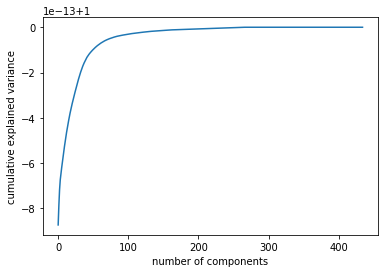

In [115]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA().fit(train_df_ready)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [116]:
pca_300 = PCA(300).fit(train_df_ready)
X_train_pca = pca_300.transform(train_df_ready)

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [118]:
model_0 = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
model_0.fit(X_train_pca, y_train_total)
y_pred_forest_short = model_0.predict(X_train_pca)
print(classification_report(y_train_total, y_pred_forest_short))
print(roc_auc_score(y_train_total, y_pred_forest_short))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99     39846
          1       0.99      0.99      0.99     52854

avg / total       0.99      0.99      0.99     92700

0.9897707405204896


In [119]:
X_train, X_test, y_train, y_test  =  train_test_split(X_train_pca, y_train_total, test_size = 0.25, random_state=42)

In [120]:
model_0.fit(X_train, y_train)
y_pred_test = model_0.predict(X_test)
print(classification_report(y_test, y_pred_test))
print(roc_auc_score(y_test, y_pred_test))

             precision    recall  f1-score   support

          0       0.65      0.61      0.63      9889
          1       0.72      0.76      0.74     13286

avg / total       0.69      0.69      0.69     23175

0.681321615437909


In [121]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

In [122]:
class_weights

array([1.16041326, 0.87855085])

In [124]:
x_val = X_train_pca[:15000]
partial_x_train = X_train_pca[15000:]
y_val = y_train_total[:15000].values
partial_y_train = y_train_total[15000:].values

In [160]:
from keras import losses
from keras import metrics
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(50, activation='relu', input_shape=(300,)))
#model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    #class_weight=class_weights,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 77700 samples, validate on 15000 samples
Epoch 1/30
77700/77700 [==============================] - ETA: 0s - loss: 7.4818 - acc: 0.532 - 1s 9us/step - loss: 7.5956 - acc: 0.5252 - val_loss: 9.3724 - val_acc: 0.4181
Epoch 2/30
77700/77700 [==============================] - 0s 5us/step - loss: 7.6582 - acc: 0.5218 - val_loss: 6.6639 - val_acc: 0.5819
Epoch 3/30
77700/77700 [==============================] - 0s 5us/step - loss: 7.0160 - acc: 0.5602 - val_loss: 6.6639 - val_acc: 0.5819
Epoch 4/30
77700/77700 [==============================] - 0s 5us/step - loss: 7.2630 - acc: 0.5453 - val_loss: 6.9107 - val_acc: 0.5670
Epoch 5/30
77700/77700 [==============================] - 0s 5us/step - loss: 7.5399 - acc: 0.5281 - val_loss: 6.9075 - val_acc: 0.5670
Epoch 6/30
77700/77700 [==============================] - 0s 5us/step - loss: 8.4868 - acc: 0.4717 - val_loss: 6.6612 - val_acc: 0.5819
Epoch 7/30
77700/77700 [==============================] - 0s 5us/step - loss: 7.7357 - acc: 0.51

In [161]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

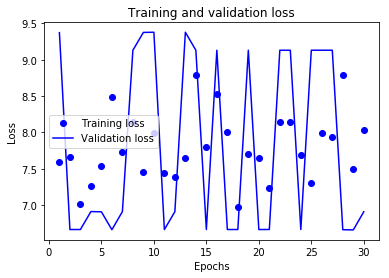

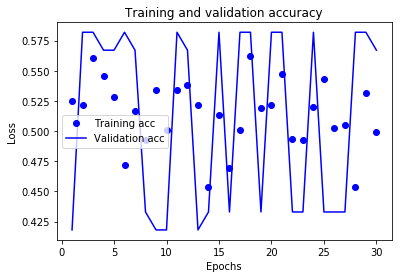

In [162]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Контроль выбросов

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest